In [1]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#Importing Training Data

#Training Dataset is uploaded in  github repository to not require manual dowloading and adjusting of data path
churn_train_url = "https://raw.githubusercontent.com/PyroGiel/churn/master/churn_train.csv"
churn_train = pd.read_csv(churn_train_url)

In [3]:
#Exploring Training Data

print(churn_train.shape)
print(churn_train.columns)
churn_train.head(60)

(4000, 21)
Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,45.0,106,1.0,1395,0.0,0.0,0,235.2,121,39.98,...,87,18.75,236.3,91,10.63,11.8,4.0,3.19,1.0,0
1,44.0,51,0.0,4191,0.0,1.0,0,212.9,80,36.19,...,57,20.07,187.6,99,8.44,8.8,4.0,2.38,2.0,0
2,10.0,64,2.0,4508,0.0,0.0,0,216.9,78,36.87,...,115,17.94,179.8,116,8.09,11.4,5.0,3.08,3.0,0
3,31.0,59,2.0,1041,1.0,1.0,31,225.0,78,38.25,...,79,16.26,226.7,79,10.20,9.1,3.0,2.46,NaN,0
4,8.0,136,1.0,1349,0.0,0.0,0,101.7,105,17.29,...,99,17.24,136.2,119,6.13,9.4,6.0,2.54,3.0,0
5,22.0,142,0.0,3717,0.0,0.0,0,245.1,66,41.67,...,109,12.29,227.3,112,10.23,3.1,4.0,0.84,1.0,0
6,19.0,62,1.0,3051,1.0,0.0,0,159.7,86,27.15,...,76,16.79,121.6,105,5.47,13.9,NaN,3.75,0.0,1
7,6.0,73,2.0,4811,0.0,0.0,0,159.0,123,27.03,...,95,19.83,178.9,155,8.05,15.2,3.0,4.10,2.0,0
8,20.0,139,1.0,2926,0.0,0.0,0,102.2,76,17.37,...,106,19.55,183.4,136,8.25,10.8,4.0,2.92,1.0,0
9,14.0,65,1.0,3611,0.0,0.0,0,180.3,84,30.65,...,129,16.99,280.1,62,12.60,12.1,1.0,3.27,3.0,0


The Dataset contains of 4000 rows and 21 collumns.

Here we shall see a brief explanation of the variables present in the Churn data.<br>
State. Column representing the states in the US.<br>
Account Length. How long the account has been active.<br> 
Area Code. Area ID. <br>
Phone Number. Surrogate for Customer ID. <br>
International Plan. Whether present (1) or not (0). <br> 
Voice Mail Plan. Present (1) or not (0). <br>
Number of Voice Mail Messages. Number of messages in voice mail. <br>
Total Day Minutes. Minutes customer used service during the day. <br>
Total Day Calls. Number of daily calls. <br>
Total Day Charge. Daily cost of the customer. <br>
Total Eve Minutes. Minutes customer used service during the evening. <br>
Total Eve Calls. Number of evening calls. <br>
Total Eve Charge. Evening cost of the customer. <br>
Total Night Minutes. Minutes customer used service during the night. <br>
Total Night Calls. Number of night calls. <br>
Total Night Charge. Night cost of the customer. <br>
Total International Minutes. Minutes customer used service to make international calls. <br>
Total International Calls. Number of international calls. <br>
Total International Charge. International service costs of the customer. <br>
Number Customer Service Calls. Number of calls of the customer to the customer service.<br> 
Churn (class). 0 = No churn; 1 = Churn.<br>


0    3434
1     566
Name: churn, dtype: int64
churn pct:  0.1415


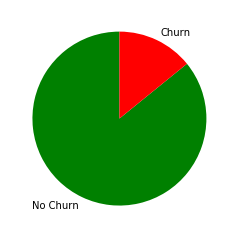

In [4]:
#First look at distribution of classifier churn
churn_counts = churn_train['churn'].value_counts()
print(churn_counts)

plt.pie(churn_counts, labels=['No Churn', 'Churn'], colors=['g', 'r'], startangle=90)

churn_pct = 566 /(3434+566)
print('churn pct: ', churn_pct)

Transforming Data:

In [5]:
#phone_number can be dropped. It doesn't affect prediction and might be sensitive.
churn_train.drop(['phone_number'], axis=1, inplace=True)

In [6]:
#check for missing values
churn_train.isna().sum(axis=1).sum(), churn_train.isna().sum()

(1604, state                               0
 account_length                      0
 area_code                         189
 international_plan                  0
 voice_mail_plan                     0
 number_vmail_messages               0
 total_day_minutes                   0
 total_day_calls                     0
 total_day_charge                    0
 total_eve_minutes                   0
 total_eve_calls                     0
 total_eve_charge                    0
 total_night_minutes                 0
 total_night_calls                   0
 total_night_charge                  0
 total_intl_minutes                  0
 total_intl_calls                 1076
 total_intl_charge                   0
 number_customer_service_calls     339
 churn                               0
 dtype: int64)

There are a lot of missing values: 1604.<br>
This means these rows.<br>
To decide what to do with these values, one looks at the specific collumns.

mean:  4.448358413132695
median:  4.0
mode:  ModeResult(mode=array([3.]), count=array([584]))


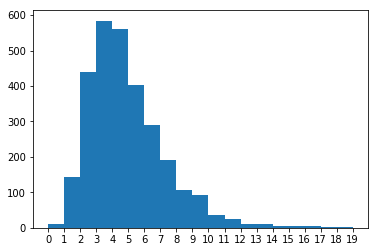

In [7]:
#Total International Calls

#Data with missing values dropped
intl_calls_nonans = churn_train['total_intl_calls'].dropna()

plt.xticks(np.arange(21))
plt.hist(intl_calls_nonans, bins=np.unique(intl_calls_nonans))

print('mean: ', np.mean(intl_calls_nonans))
print('median: ', np.median(intl_calls_nonans))
print('mode: ', stats.mode(intl_calls_nonans))

Distribution:  3.0     0.199726
4.0     0.191518
2.0     0.150137
5.0     0.137483
6.0     0.099179
7.0     0.064979
1.0     0.049248
8.0     0.036936
9.0     0.031806
10.0    0.012312
11.0    0.008208
0.0     0.004104
12.0    0.003762
13.0    0.003762
16.0    0.002052
14.0    0.001710
15.0    0.001710
18.0    0.000684
17.0    0.000342
19.0    0.000342
Name: total_intl_calls, dtype: float64


(array([ 16., 190., 597., 808., 781., 530., 393., 264., 149., 128.,  53.,
         34.,  16.,  14.,   7.,   6.,   6.,   2.,   6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 19 Patch objects>)

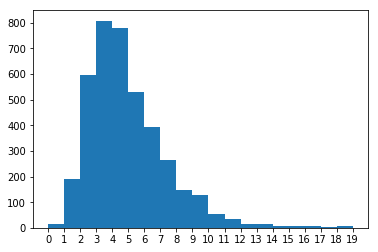

In [8]:
#Because there are over 1000 missing values, filling nans with 1 specific value would ruin the data
#The missing values should be replaced approximately to the current distribution (EXCEPT TOTAL MIN=0?)
intl_calls_distr = intl_calls_nonans.value_counts(normalize=True)
print('Distribution: ', intl_calls_distr)


intl_calls_missing = churn_train['total_intl_calls'].isnull()
churn_train.loc[intl_calls_missing,'total_intl_calls'] = np.random.choice(intl_calls_distr.index, size=len(churn_train[intl_calls_missing]), p=intl_calls_distr.values)


plt.xticks(np.arange(21))
plt.hist(churn_train['total_intl_calls'], bins=np.unique(churn_train['total_intl_calls']))

In [9]:
churn_train.isna().sum()

state                              0
account_length                     0
area_code                        189
international_plan                 0
voice_mail_plan                    0
number_vmail_messages              0
total_day_minutes                  0
total_day_calls                    0
total_day_charge                   0
total_eve_minutes                  0
total_eve_calls                    0
total_eve_charge                   0
total_night_minutes                0
total_night_calls                  0
total_night_charge                 0
total_intl_minutes                 0
total_intl_calls                   0
total_intl_charge                  0
number_customer_service_calls    339
churn                              0
dtype: int64

mean:  1.5632340890467085
median:  1.0
mode:  ModeResult(mode=array([1.]), count=array([1297]))


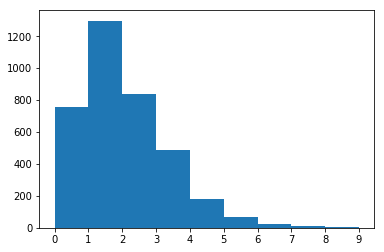

In [10]:
#Total Cus Service Calls

#Data with missing values dropped
cs_calls_nonans = churn_train['number_customer_service_calls'].dropna()

plt.xticks(np.arange(10))
plt.hist(cs_calls_nonans, bins=np.unique(cs_calls_nonans))

print('mean: ', np.mean(cs_calls_nonans))
print('median: ', np.median(cs_calls_nonans))
print('mode: ', stats.mode(cs_calls_nonans))

Distribution:  1.0    0.354275
2.0    0.229172
0.0    0.205955
3.0    0.133570
4.0    0.049167
5.0    0.018301
6.0    0.006282
7.0    0.002458
8.0    0.000546
9.0    0.000273
Name: number_customer_service_calls, dtype: float64


(array([ 826., 1411.,  910.,  541.,  195.,   80.,   24.,   10.,    3.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 9 Patch objects>)

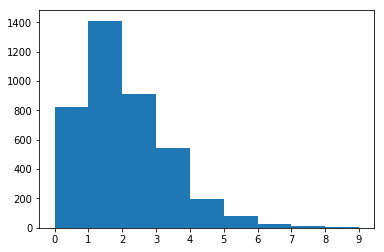

In [11]:
#Previous method worked well, so it is reused here
cs_calls_distr = cs_calls_nonans.value_counts(normalize=True)
print('Distribution: ', cs_calls_distr)


cs_calls_missing = churn_train['number_customer_service_calls'].isnull()
churn_train.loc[cs_calls_missing,'number_customer_service_calls'] = np.random.choice(cs_calls_distr.index, size=len(churn_train[cs_calls_missing]), p=cs_calls_distr.values)


plt.xticks(np.arange(10))
plt.hist(churn_train['number_customer_service_calls'], bins=np.unique(churn_train['number_customer_service_calls']))

In [12]:
churn_train.isna().sum()

state                              0
account_length                     0
area_code                        189
international_plan                 0
voice_mail_plan                    0
number_vmail_messages              0
total_day_minutes                  0
total_day_calls                    0
total_day_charge                   0
total_eve_minutes                  0
total_eve_calls                    0
total_eve_charge                   0
total_night_minutes                0
total_night_calls                  0
total_night_charge                 0
total_intl_minutes                 0
total_intl_calls                   0
total_intl_charge                  0
number_customer_service_calls      0
churn                              0
dtype: int64

In [13]:
#Area code is either 0, 1 or 2.
#whole collumn can be removed without influencing predictions.

churn_train.drop(['area_code'], axis=1, inplace=True)
churn_train.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,45.0,106,0.0,0.0,0,235.2,121,39.98,220.6,87,18.75,236.3,91,10.63,11.8,4.0,3.19,1.0,0
1,44.0,51,0.0,1.0,0,212.9,80,36.19,236.1,57,20.07,187.6,99,8.44,8.8,4.0,2.38,2.0,0
2,10.0,64,0.0,0.0,0,216.9,78,36.87,211.0,115,17.94,179.8,116,8.09,11.4,5.0,3.08,3.0,0
3,31.0,59,1.0,1.0,31,225.0,78,38.25,191.3,79,16.26,226.7,79,10.20,9.1,3.0,2.46,1.0,0
4,8.0,136,0.0,0.0,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6.0,2.54,3.0,0


In [14]:
#Look if all dtypes are appropriate 
print(churn_train.dtypes)

#state, total_intl_calls, number_customer_service_calls from float to int
churn_train.state = churn_train.state.astype(int)
churn_train.total_intl_calls = churn_train.total_intl_calls.astype(int)
churn_train.number_customer_service_calls = churn_train.number_customer_service_calls.astype(int)


#international_plan, voice_mail_plan from float to boolean
churn_train.international_plan = churn_train.international_plan.astype(int)
churn_train.voice_mail_plan = churn_train.voice_mail_plan.astype(int)

churn_train.head()

state                            float64
account_length                     int64
international_plan               float64
voice_mail_plan                  float64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
churn                              int64
dtype: object


,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,45,106,0,0,0,235.2,121,39.98,220.6,87,18.75,236.3,91,10.63,11.8,4,3.19,1,0
1,44,51,0,1,0,212.9,80,36.19,236.1,57,20.07,187.6,99,8.44,8.8,4,2.38,2,0
2,10,64,0,0,0,216.9,78,36.87,211.0,115,17.94,179.8,116,8.09,11.4,5,3.08,3,0
3,31,59,1,1,31,225.0,78,38.25,191.3,79,16.26,226.7,79,10.20,9.1,3,2.46,1,0
4,8,136,0,0,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6,2.54,3,0


Prediction:

In [15]:
#Create train & test Data

y = churn_train["churn"].values
X = churn_train.drop(labels = ["churn"],axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
#Checking for correlations
X_train.corr()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
state,1.000000,0.000749,0.014123,-0.020104,-0.016026,0.023457,-0.011777,0.023461,0.001294,-0.014379,0.001284,0.015316,0.001499,0.015317,-0.013589,0.000774,-0.013626,-0.019377
account_length,0.000749,1.000000,0.019483,-0.015234,-0.024291,0.010210,0.010825,0.010202,-0.009262,0.011337,-0.009252,0.006163,-0.012295,0.006177,0.009368,-0.001089,0.009431,0.001781
international_plan,0.014123,0.019483,1.000000,0.020638,0.016110,0.032133,0.010831,0.032135,-0.006181,0.000738,-0.006177,-0.029855,0.011719,-0.029866,0.035100,-0.014973,0.035067,-0.013320
voice_mail_plan,-0.020104,-0.015234,0.020638,1.000000,0.956495,0.021272,0.011184,0.021268,0.011451,0.008884,0.011438,0.006074,0.002150,0.006074,-0.005989,0.016027,-0.005917,0.000186
number_vmail_messages,-0.016026,-0.024291,0.016110,0.956495,1.000000,0.033390,0.013899,0.033385,0.012453,0.009244,0.012443,0.007047,-0.001059,0.007038,-0.008699,0.018650,-0.008641,0.006701
total_day_minutes,0.023457,0.010210,0.032133,0.021272,0.033390,1.000000,-0.012045,1.000000,0.000047,-0.012078,0.000014,0.017736,0.019358,0.017716,-0.004174,-0.010761,-0.004151,0.017494
total_day_calls,-0.011777,0.010825,0.010831,0.011184,0.013899,-0.012045,1.000000,-0.012046,0.010907,0.007528,0.010925,0.006841,-0.018776,0.006851,0.015762,0.001178,0.015829,-0.008348
total_day_charge,0.023461,0.010202,0.032135,0.021268,0.033385,1.000000,-0.012046,1.000000,0.000052,-0.012076,0.000019,0.017741,0.019362,0.017722,-0.004178,-0.010770,-0.004155,0.017490
total_eve_minutes,0.001294,-0.009262,-0.006181,0.011451,0.012453,0.000047,0.010907,0.000052,1.000000,0.005364,1.000000,-0.040541,0.012302,-0.040535,-0.006860,0.010854,-0.006805,-0.015590
total_eve_calls,-0.014379,0.011337,0.000738,0.008884,0.009244,-0.012078,0.007528,-0.012076,0.005364,1.000000,0.005379,-0.003978,-0.018063,-0.003966,0.014707,-0.030441,0.014639,-0.000070


In [17]:
#Correlations specific to 'churn'
all_train = X_train
all_train = all_train.assign(y=y_train)
all_train.corr()['y']

state                            0.001391
account_length                   0.027486
international_plan               0.260543
voice_mail_plan                 -0.101511
number_vmail_messages           -0.093378
total_day_minutes                0.209728
total_day_calls                  0.026310
total_day_charge                 0.209725
total_eve_minutes                0.085252
total_eve_calls                 -0.004857
total_eve_charge                 0.085246
total_night_minutes              0.055530
total_night_calls               -0.006910
total_night_charge               0.055532
total_intl_minutes               0.089839
total_intl_calls                -0.063160
total_intl_charge                0.089786
number_customer_service_calls    0.187316
y                                1.000000
Name: y, dtype: float64

In [18]:
all_train.corr().style.background_gradient(cmap='Blues')

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,y
state,1,0.000749255,0.0141233,-0.020104,-0.0160258,0.0234569,-0.0117768,0.0234611,0.00129441,-0.0143789,0.00128383,0.015316,0.00149913,0.0153168,-0.0135886,0.000774057,-0.0136263,-0.0193768,0.00139076
account_length,0.000749255,1,0.0194834,-0.0152339,-0.0242912,0.0102099,0.0108248,0.010202,-0.00926158,0.0113371,-0.00925196,0.0061631,-0.0122945,0.00617719,0.00936827,-0.00108881,0.00943093,0.00178078,0.0274859
international_plan,0.0141233,0.0194834,1,0.0206379,0.0161104,0.0321334,0.0108308,0.0321351,-0.00618077,0.000738463,-0.00617693,-0.0298548,0.0117191,-0.0298655,0.0350995,-0.014973,0.0350665,-0.0133199,0.260543
voice_mail_plan,-0.020104,-0.0152339,0.0206379,1,0.956495,0.0212724,0.0111838,0.0212683,0.0114507,0.00888371,0.0114382,0.00607361,0.00214983,0.00607435,-0.00598936,0.0160269,-0.00591685,0.000186424,-0.101511
number_vmail_messages,-0.0160258,-0.0242912,0.0161104,0.956495,1,0.0333899,0.0138993,0.0333848,0.0124527,0.00924392,0.0124428,0.0070475,-0.00105897,0.0070377,-0.00869874,0.0186501,-0.00864065,0.00670086,-0.0933779
total_day_minutes,0.0234569,0.0102099,0.0321334,0.0212724,0.0333899,1,-0.0120452,1,4.74382e-05,-0.0120785,1.41136e-05,0.0177355,0.0193583,0.0177163,-0.00417412,-0.010761,-0.00415135,0.0174942,0.209728
total_day_calls,-0.0117768,0.0108248,0.0108308,0.0111838,0.0138993,-0.0120452,1,-0.0120463,0.0109074,0.00752767,0.0109246,0.00684102,-0.0187756,0.00685064,0.0157622,0.00117815,0.0158293,-0.00834789,0.0263102
total_day_charge,0.0234611,0.010202,0.0321351,0.0212683,0.0333848,1,-0.0120463,1,5.23912e-05,-0.0120763,1.90664e-05,0.0177411,0.0193621,0.0177219,-0.00417778,-0.0107703,-0.004155,0.0174897,0.209725
total_eve_minutes,0.00129441,-0.00926158,-0.00618077,0.0114507,0.0124527,4.74382e-05,0.0109074,5.23912e-05,1,0.00536405,1,-0.0405412,0.012302,-0.040535,-0.00685976,0.0108538,-0.00680488,-0.0155903,0.0852516
total_eve_calls,-0.0143789,0.0113371,0.000738463,0.00888371,0.00924392,-0.0120785,0.00752767,-0.0120763,0.00536405,1,0.00537872,-0.00397813,-0.0180627,-0.0039655,0.0147074,-0.0304413,0.0146391,-6.97682e-05,-0.00485723


0.85375
0.5808888888888888


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


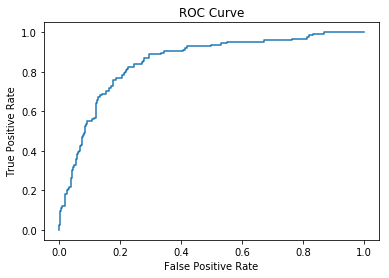

In [19]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(max_iter=2000)
result = model_logreg.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model_logreg.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

#Get weights of all variables
weights = pd.Series(model_logreg.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

#ROC Curve
from sklearn.metrics import roc_curve
scores = model_logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

0.86
0.714962962962963


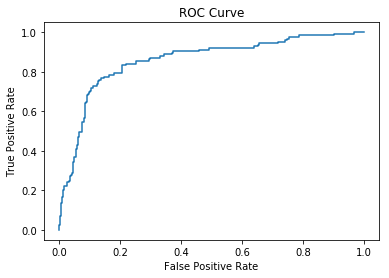

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB

model_gaussiannb = GaussianNB()
result = model_gaussiannb.fit(X_train, y_train)

prediction_test = model_gaussiannb.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

#ROC Curve
scores = model_gaussiannb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

y_train

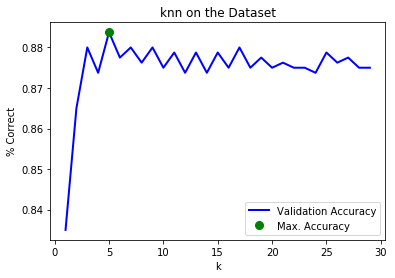

In [21]:
from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1, 30, 1)
validation_accuracy = []

for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    validation_accuracy.append(knn.score(X_test, y_test))
    

plt.plot(figsize=(10,5))
plt.plot(k_values, validation_accuracy, "b-", linewidth=2, label="Validation Accuracy")
plt.plot(k_values[np.argmax(validation_accuracy)], np.max(validation_accuracy), "og", markersize=8, label="Max. Accuracy") 
plt.xlabel("k")
plt.ylabel("% Correct")
plt.title("knn on the Dataset")
plt.legend()
plt.show()

0.88
0.6616296296296296


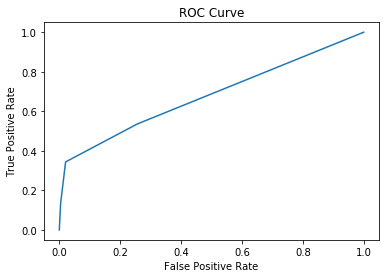

In [22]:
#NearestNeighbours


model_KNN = KNeighborsClassifier(n_neighbors=3) 
result = model_KNN.fit(X_train, y_train)

prediction_test = model_KNN.predict(X_test)

# Print the prediction accuracy and AUC-Score
print(metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

#ROC Curve
scores = model_KNN.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

0.8525
0.5931851851851851


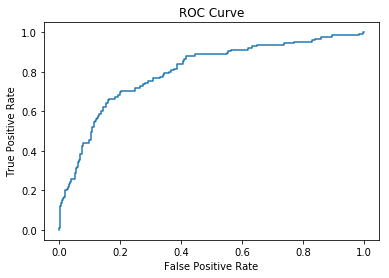

In [23]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier

model_MLP = MLPClassifier()
result = model_MLP.fit(X_train, y_train)

prediction_test = model_MLP.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

#ROC Curve
scores = model_MLP.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

0.8875
0.776888888888889


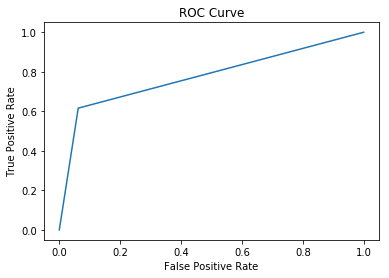

In [24]:
#Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
result = model_tree.fit(X_train, y_train)

prediction_test = model_tree.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

#ROC Curve
scores = model_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()